# 2 Hands On: Data Quality and Pre-Processing

## 1. Assessing Data Quality

Load the following packages: dplyr, na.tools, tidyimpute (version from github decisionpatterns/tidyimpute")


In [1]:
# Install packages 
install.packages(c("dplyr", "na.tools"))
#Load packages
library(dplyr)
library(na.tools)


Installing packages into 'C:/Users/Paola/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked
package 'na.tools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paola\AppData\Local\Temp\Rtmp21qe5a\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#To install tidyimpute, install remotes 
install.packages("remotes")
# Install tidyimpute
remotes::install_github("decisionpatterns/tidyimpute")
#Load package
library(tidyimpute)


Installing package into 'C:/Users/Paola/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'remotes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paola\AppData\Local\Temp\Rtmp21qe5a\downloaded_packages


Skipping install of 'tidyimpute' from a github remote, the SHA1 (9e07748f) has not changed since last install.
  Use `force = TRUE` to force installation



Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of each car.



In [3]:
#Load the data set
load("C:/Users/Paola/Documents/GitHub/hands-on-2023A/data/02_dataquality/carInsurance.Rdata")

# Convert the loaded object to a data frame 
df <- as.data.frame(carIns)

# Write the data frame to a CSV file
write.csv(df, "carInsurance.csv", row.names = FALSE)

#Check the new file .csv
head(df, 10)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


### (a) Check if there are any missing values.Tip: use the function any_na().

In [4]:
# Check for missing values
if (any_na(df)) {
  print("There are missing values in the dataset.")
} else {
  print("There are no missing values in the dataset.")
}


[1] "There are missing values in the dataset."


### (b) Count the number of cases that have, at least, one missing value.Tip: use the function filter_any_na() and then count().


In [5]:
# Filter cases with at least one missing value and count them
missing_cases <- df %>% filter_any_na() %>% count()

# Print the number of cases with missing values
print(missing_cases)


    n
1 159


### (c) Create a new data set by removing all the cases that have missing values.Tip: use the function drop_rows_any_na()

In [6]:
# Create a new dataset without missing values
new_df <- drop_rows_any_na(df)
#Print the first 10 rows
head(new_df,10)


,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
11,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
12,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
13,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
14,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
19,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


### (d) Create a new data set by imputing all the missing values with 0. Tip: explore the variants of the function impute()


In [7]:
# Create a new dataset with missing values imputed as 0
new_dataset <- impute(new_df, method = "fixed", fixed_value = 0)
#Print the first 10 rows
head(new_dataset,10)


,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
11,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
12,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
13,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
14,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
19,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


### (e) Create a new data set by imputing the mean in all the columns which have double type values.


In [8]:
# Identify columns with double type values
double_columns <- sapply(new_df, is.double)

# Impute the mean in the identified columns
new_dataset1 <- new_df
for (col in names(new_dataset1)[double_columns]) {
  new_dataset1[[col]][is.na(new_dataset1[[col]])] <- mean(new_dataset1[[col]], na.rm = TRUE)
}
head(new_dataset1,10)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
11,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
12,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
13,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
14,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
19,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


### (f) Create a new data set by imputing the mode in all the columns which have integer type values.

In [9]:
# Function to calculate the mode
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Identify columns with integer type values
integer_columns <- sapply(new_df, is.integer)

# Impute the mode in the identified columns
new_dataset2 <- new_df
for (col in names(new_dataset2)[integer_columns]) {
  new_dataset2[[col]][is.na(new_dataset2[[col]])] <- Mode(new_dataset2[[col]])
}
head(new_dataset2,10)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
11,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
12,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
13,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
14,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
19,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


### (g) Create a new data set by imputing the most frequent value to the column \"nDoors\". Tip: use the function impute_replace()

In [10]:
# Calculate the most frequent value of "nDoors"
most_frequent_nDoors <- new_df %>%
  count(nDoors) %>%
  filter(n == max(n)) %>%
  pull(nDoors)

# Create a new data set by imputing the most frequent value to the "nDoors" column
new_dataset3 <- new_df %>%
  mutate(nDoors = if_else(is.na(nDoors), most_frequent_nDoors, nDoors))
head(new_dataset3,10)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
11,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
12,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
13,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
14,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
19,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


### (h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?Tip: use the functions distinct() and count()


In [11]:
# Combine the three imputed datasets into a final dataset
final_dataset <- bind_rows(new_dataset1, new_dataset2, new_dataset3)

head (final_dataset,10)
# Check for duplicated cases
duplicated_cases <- final_dataset %>%
  distinct() %>%
  count() %>%
  filter(n > 1)

# Print the duplicated cases
print(duplicated_cases)


,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
3,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
4,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
5,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
6,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
7,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
8,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
9,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


    n
1 159


In [30]:
# Export to .csv file
write.csv(final_dataset, file = "carInsu_fin.csv", row.names = FALSE)


## 2. Data Pre-Processing

### 2. Load the package dlookr. Use the same car insurance data set above and apply the following transformations to the price attribute. Be critical regarding the obtained results.

In [12]:
#Install package
install.packages("dlookr")
#Load
library(dlookr)

Installing package into 'C:/Users/Paola/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dlookr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paola\AppData\Local\Temp\Rtmp21qe5a\downloaded_packages



Attaching package: 'dlookr'


The following object is masked from 'package:base':

    transform




In [13]:
head(df,5)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


#### (a) Apply range-based normalization and z-score normalization. Tip: use the function transform().

In [14]:
# Apply range-based normalization and z-score normalization
transformed_data <- transform(df, 
                              price_range = scale_range(price),
                              price_zscore = scale_z(price))

# View the transformed data
head(transformed_data,5)

ERROR: Error in transform(df, price_range = scale_range(price), price_zscore = scale_z(price)): unused arguments (price_range = scale_range(price), price_zscore = scale_z(price))


In [15]:
# Range-based normalization
df_norm <- df %>%
  mutate(price_range_norm = (price - min(price)) / (max(price) - min(price)))
head(df_norm,5)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price,price_range_norm
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9,111,5000,21,27,13495,NA
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9,111,5000,21,27,16500,NA
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9,154,5000,19,26,16500,NA
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10,102,5500,24,30,13950,NA
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8,115,5500,18,22,17450,NA


In [16]:
# Z-score normalization
df_z <- df %>%
  mutate(price_zscore_norm = (price - mean(price)) / sd(price))
head(df_z,5)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price,price_zscore_norm
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9,111,5000,21,27,13495,NA
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9,111,5000,21,27,16500,NA
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9,154,5000,19,26,16500,NA
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10,102,5500,24,30,13950,NA
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8,115,5500,18,22,17450,NA


#### (b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges. Tip: use the function binning().

In [ ]:
# Discretize the price attribute into equal-frequency ranges and equal-width ranges
discretized_data <- binning(transformed_data, vars(price), n = 4, type = "equal_frequency")

### 3. With the seed 111019 obtain the following samples on the car insurance data set. Tip: use the function sample_frac().

In [17]:
# Set the seed
set.seed(111019)
#View dataset
head(df,5)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


#### (a) A random sample of 60% of the cases, with replacement

In [18]:
# Random sample of 60% of the cases, with replacement
random_sample <- sample_frac(df, 0.6, replace = TRUE)
#Print 
head(random_sample,5)

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,⋯,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
2,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,⋯,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529
3,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,⋯,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630
4,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,0,102,subaru,gas,std,four,sedan,4wd,front,97.0,⋯,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233


#### (b) A stratified sample of 60% of the cases of cars, according to the fuelType attribute.

In [19]:
# Stratified sample of 60% of the cases of cars, according to the fuelType attribute
stratified_sample <- df %>%
  group_by(fuelType) %>%
  sample_frac(0.6, replace = FALSE)
head(stratified_sample,5)

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,⋯,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,⋯,97,idi,3.01,3.40,23.0,52,4800,37,46,7995
0,NA,peugot,diesel,turbo,four,wagon,rwd,front,114.2,⋯,152,idi,3.70,3.52,21.0,95,4150,25,25,13860
2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,⋯,97,idi,3.01,3.40,23.0,52,4800,37,46,7775
0,NA,peugot,diesel,turbo,four,wagon,rwd,front,114.2,⋯,152,idi,3.70,3.52,21.0,95,4150,25,25,17075


#### (c) Use the table() function to inspect the distribution of values in each of the two samples above.

In [20]:
# Inspect the distribution of values in each of the two samples
table(random_sample$fuelType)
table(stratified_sample$fuelType)


diesel    gas 
     8    115 


diesel    gas 
    12    111 

### 4. Load the package corrplot and select the numeric attributes of the car insurance data set.

In [21]:
#To install the package
install.packages("corrplot")
# Load the package
library(corrplot)


Installing package into 'C:/Users/Paola/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paola\AppData\Local\Temp\Rtmp21qe5a\downloaded_packages


corrplot 0.92 loaded



In [22]:
# Select numeric attributes from the carInsurance dataset
num_attri <- df %>% select_if(is.numeric)
head (num_attri, 5)

,symb,normLoss,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,3,NA,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,13495
2,3,NA,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,16500
3,1,NA,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26,16500
4,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10,102,5500,24,30,13950
5,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8,115,5500,18,22,17450


#### (a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.

In [23]:
# Calculate Pearson correlation coefficient
cor_coeff <- cor(num_attri, method = "pearson")
cor_coeff

,symb,normLoss,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
symb,1.00000000,NA,-0.5319537,-0.3576115,-0.2329191,-0.54103820,-0.2276906,-0.10578971,NA,NA,-0.17851508,NA,NA,-0.03582263,0.0346060,NA
normLoss,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
wheelBase,-0.53195368,NA,1.0000000,0.8745875,0.7951436,0.58943476,0.7763863,0.56932868,NA,NA,0.24978585,NA,NA,-0.47041361,-0.5440819,NA
length,-0.35761152,NA,0.8745875,1.0000000,0.8411183,0.49102946,0.8777285,0.68335987,NA,NA,0.15841371,NA,NA,-0.67090866,-0.7046616,NA
width,-0.23291906,NA,0.7951436,0.8411183,1.0000000,0.27921032,0.8670325,0.73543340,NA,NA,0.18112863,NA,NA,-0.64270434,-0.6772179,NA
height,-0.54103820,NA,0.5894348,0.4910295,0.2792103,1.00000000,0.2955717,0.06714874,NA,NA,0.26121423,NA,NA,-0.04863963,-0.1073576,NA
curbWeight,-0.22769059,NA,0.7763863,0.8777285,0.8670325,0.29557173,1.0000000,0.85059407,NA,NA,0.15136174,NA,NA,-0.75741378,-0.7974648,NA
engineSize,-0.10578971,NA,0.5693287,0.6833599,0.7354334,0.06714874,0.8505941,1.00000000,NA,NA,0.02897136,NA,NA,-0.65365792,-0.6774699,NA
bore,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA
stroke,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA


#### (b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables.

In [24]:
# Calculate p-values and confidence intervals of the correlation coefficient
cor_test <- cor.mtest(num_attri, conf.level = 0.95)
cor_test

,symb,normLoss,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
symb,0.000000e+00,3.432929e-13,2.255894e-16,1.409339e-07,7.770414e-04,5.531350e-17,1.025874e-03,1.311313e-01,5.750916e-02,0.899491367,1.043948e-02,3.098897e-01,7.359080e-05,6.101009e-01,6.222950e-01,2.449149e-01
normLoss,3.432929e-13,0.000000e+00,3.439849e-01,7.679017e-01,1.805700e-01,7.428895e-09,1.262266e-01,3.218897e-02,6.497992e-01,0.409653480,9.039883e-02,1.204793e-04,6.174988e-04,8.314261e-04,6.748692e-03,9.045759e-03
wheelBase,2.255894e-16,3.439849e-01,0.000000e+00,9.699227e-66,5.612752e-46,1.437985e-20,1.439877e-42,5.233096e-19,1.475771e-13,0.022015524,3.039092e-04,2.540628e-07,1.209679e-07,1.103347e-12,3.420917e-17,8.076488e-20
length,1.409339e-07,7.679017e-01,9.699227e-66,0.000000e+00,4.332386e-56,7.731666e-14,8.728146e-67,1.496334e-29,1.162914e-21,0.066407079,2.329180e-02,8.505849e-18,3.232254e-05,3.595529e-28,4.428948e-32,8.016477e-30
width,7.770414e-04,1.805700e-01,5.612752e-46,4.332386e-56,0.000000e+00,5.031446e-05,2.460481e-63,3.685904e-36,6.240938e-18,0.009331725,9.348405e-03,5.048681e-25,1.614542e-03,2.807249e-25,7.321537e-29,9.200336e-38
height,5.531350e-17,7.428895e-09,1.437985e-20,7.731666e-14,5.031446e-05,0.000000e+00,1.688129e-05,3.387566e-01,1.234844e-02,0.421560143,1.549235e-04,1.158388e-01,2.745139e-06,4.885825e-01,1.254830e-01,5.514627e-02
curbWeight,1.025874e-03,1.262266e-01,1.439877e-42,8.728146e-67,2.460481e-63,1.688129e-05,0.000000e+00,1.404581e-58,2.013256e-25,0.016516670,3.027941e-02,4.321574e-38,1.228169e-04,1.929250e-39,2.007127e-46,2.189577e-53
engineSize,1.311313e-01,3.218897e-02,5.233096e-19,1.496334e-29,3.685904e-36,3.387566e-01,1.404581e-58,0.000000e+00,1.455497e-20,0.003243224,6.800779e-01,1.236008e-48,4.359121e-04,2.298962e-26,6.864987e-29,9.265492e-64
bore,5.750916e-02,6.497992e-01,1.475771e-13,1.162914e-21,6.240938e-18,1.234844e-02,2.013256e-25,1.455497e-20,0.000000e+00,0.430509785,9.415682e-01,4.459091e-19,1.620994e-04,1.328843e-20,1.331729e-20,1.567358e-16
stroke,8.994914e-01,4.096535e-01,2.201552e-02,6.640708e-02,9.331725e-03,4.215601e-01,1.651667e-02,3.243224e-03,4.305098e-01,0.000000000,8.141820e-03,2.048853e-01,3.156381e-01,5.453234e-01,5.302181e-01,2.501958e-01


#### (c) Plot the all correlation information using the function corrplot. Explore some of its parameters.

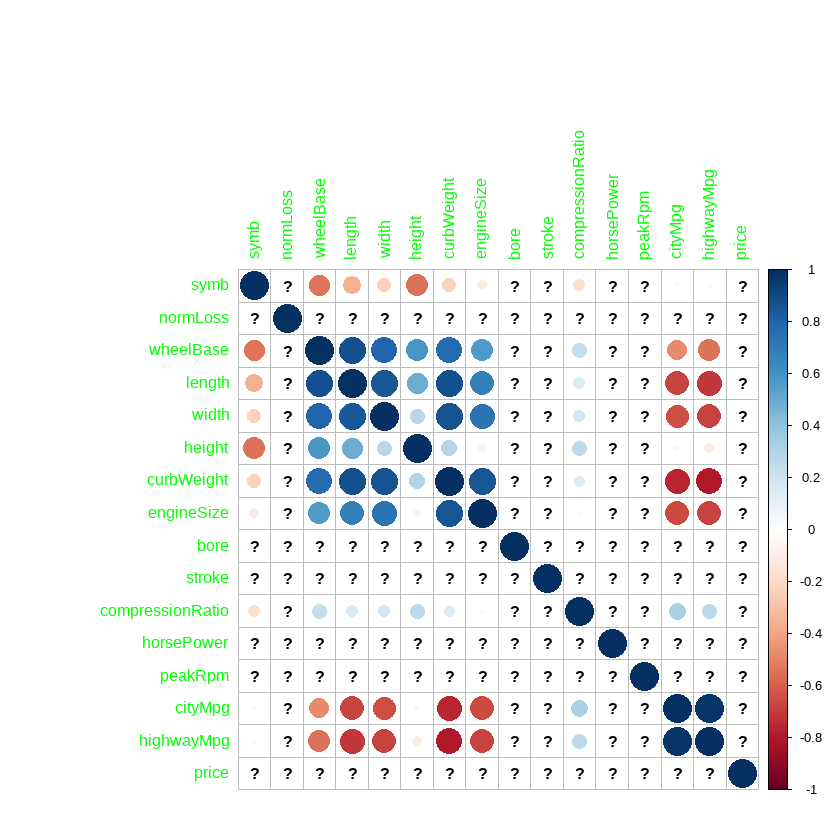

In [25]:
# Plot correlation matrix using corrplot
corrplot(cor_coeff, method = "circle", type = "full", tl.col = "green")

### 5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.

In [26]:
# Load the USJudgeRatings dataset
data(USJudgeRatings, package = "datasets")
#Print
head(USJudgeRatings,5)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


#### (a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is obtained by the linear combination of each component.

In [27]:
# Apply prcomp() for principal components analysis
pca <- prcomp(USJudgeRatings[, -1], scale = TRUE)

# Inspect the variables obtained by linear combination of each component
pca$rotation


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
INTG,0.2885122,-0.5744682517,0.117763148,-0.08380834,-0.37493974,0.50952871,0.229705308,-0.284903977,0.145484887,0.10273495,-0.0006869163
DMNR,0.2868395,-0.5763568072,-0.176986952,-0.23977262,0.39860809,-0.51407811,-0.167067325,-0.169286228,-0.005467441,-0.10539158,-0.0764809505
DILG,0.3043623,0.1385605824,0.334740068,-0.26555601,-0.59149417,-0.29806148,-0.367529033,0.004789352,-0.354685540,-0.02389188,-0.0735829555
CFMG,0.3026194,0.3100115588,0.019545609,-0.47773553,0.08202695,-0.10089374,0.722336184,0.035844452,-0.026425045,-0.20704699,-0.0131126895
DECI,0.3019234,0.3364674872,0.054443551,-0.38036525,0.39888902,0.44826185,-0.452351620,-0.199576677,0.150276288,0.13826398,-0.0422633237
PREP,0.3094144,0.1252540296,0.229233996,0.20132809,-0.08469611,-0.33583565,0.006823921,0.068955312,0.717150217,0.25188457,0.3049299442
FAMI,0.3066761,0.1228593988,0.227525865,0.52405105,0.09943784,0.03818923,0.002372688,-0.222092249,0.060538415,-0.54400573,-0.4518559528
ORAL,0.3127088,-0.0052082558,-0.005507203,0.22936834,0.14642044,-0.01945629,0.163555968,0.274475348,-0.252450059,0.66684780,-0.4660731103
WRIT,0.3110520,0.0002999784,0.148245297,0.31656247,0.23702291,0.07288963,0.060729628,-0.099198510,-0.492809116,0.01152927,0.6804727629
PHYS,0.2807447,0.2347983520,-0.820161360,0.15475146,-0.29791670,-0.03755338,-0.042123360,-0.272363503,-0.001096901,0.03061736,0.0487848868


#### (b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can label each point with the lawyer’s name by setting the labels parameter.

In [28]:
# Install the package from github
remotes::install_github("vqv/ggbiplot")
# Load the package
library(ggbiplot)

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation

Loading required package: ggplot2

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: scales

Loading required package: grid



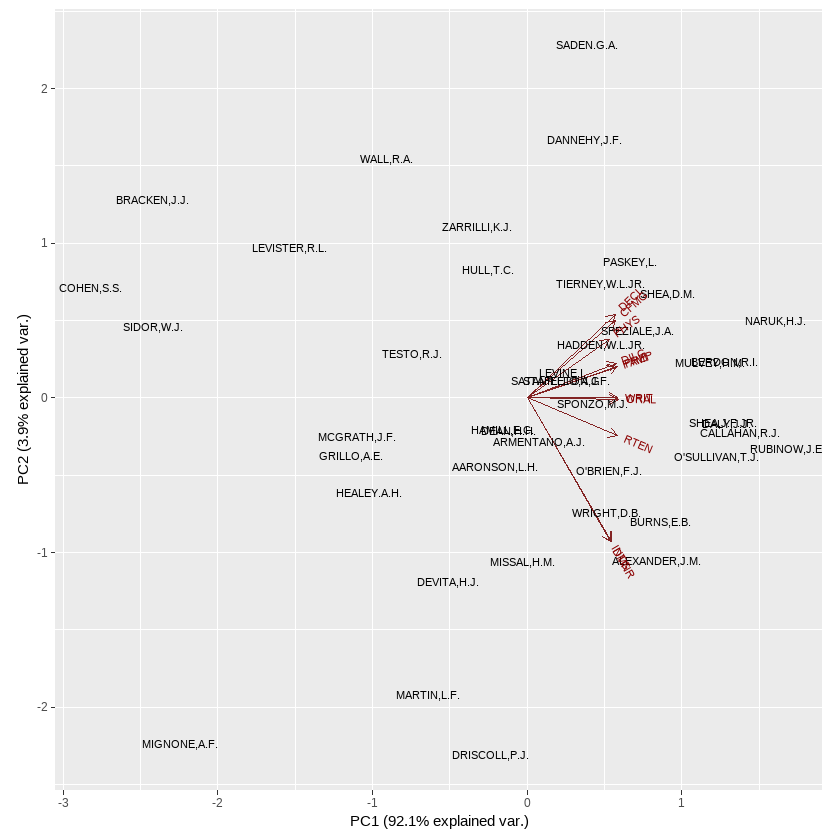

In [29]:
# Plot the first two components with labels
ggbiplot(pca, choices = c(1, 2), obs.scale = 0.1, var.scale = 0.1, labels = rownames(USJudgeRatings))
